<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#According-to-Wikipedia,-EWMA-works-well-with-stationary-data" data-toc-modified-id="According-to-Wikipedia,-EWMA-works-well-with-stationary-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>According to Wikipedia, EWMA works well with stationary data</a></span><ul class="toc-item"><li><span><a href="#EWMA-method,-respectively.-I-decided-to-look-at-the-pandas-ewma-function-to-see-how-it-handled-trends,-and-this-is-what-I-came-up-with:" data-toc-modified-id="EWMA-method,-respectively.-I-decided-to-look-at-the-pandas-ewma-function-to-see-how-it-handled-trends,-and-this-is-what-I-came-up-with:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EWMA method, respectively. I decided to look at the pandas ewma function to see how it handled trends, and this is what I came up with:</a></span></li></ul></li><li><span><a href="#regression-stock-prediction" data-toc-modified-id="regression-stock-prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>regression-stock-prediction</a></span><ul class="toc-item"><li><span><a href="#Init-import-Tdd-and-pd" data-toc-modified-id="Init-import-Tdd-and-pd-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Init import Tdd and pd</a></span></li><li><span><a href="#SVR.py" data-toc-modified-id="SVR.py-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>SVR.py</a></span></li><li><span><a href="#linear.py" data-toc-modified-id="linear.py-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>linear.py</a></span></li></ul></li><li><span><a href="#SimRank" data-toc-modified-id="SimRank-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SimRank</a></span><ul class="toc-item"><li><span><a href="#PythonでSimRankを実装した" data-toc-modified-id="PythonでSimRankを実装した-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>PythonでSimRankを実装した</a></span></li><li><span><a href="#SimRank-algorithm-implementation-in-Python" data-toc-modified-id="SimRank-algorithm-implementation-in-Python-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SimRank algorithm implementation in Python</a></span></li></ul></li></ul></div>

# According to Wikipedia, EWMA works well with stationary data

## EWMA method, respectively. I decided to look at the pandas ewma function to see how it handled trends, and this is what I came up with:

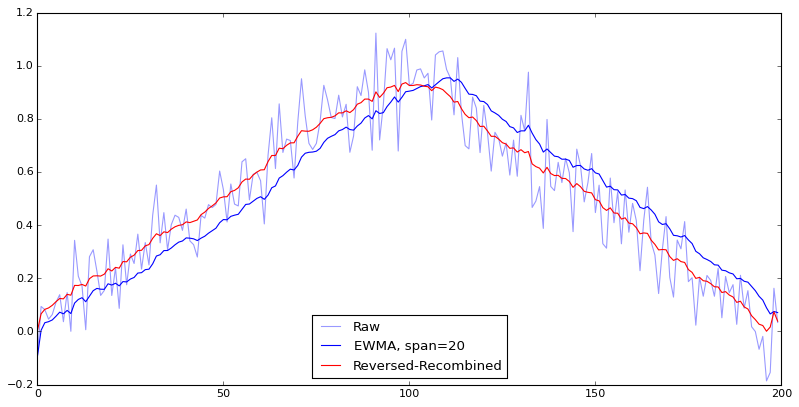

In [1]:
import numpy as np
from pylab import *
%matplotlib inline
import pandas, numpy as np
ewma = pandas.stats.moments.ewma
from IPython.core.pylabtools import figsize
figsize(12, 6)
# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )
plot( x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=15 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=15 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plot( ewma( x, span=20 ), 'b', label='EWMA, span=20' )

# "corrected" (?) EWMA
plot( c, 'r', label='Reversed-Recombined' )

legend(loc=8)
# savefig( 'ewma_correction.png', fmt='png', dpi=100 )

# regression-stock-prediction

## Init import Tdd and pd 

In [1]:
# -*- coding:utf-8 -*-
import sys
sys.path.append('../../')
%matplotlib inline
stdout = sys.stdout
import JSONData.tdx_data_Day as tdd
from ipykernel.iostream import OutStream
if isinstance(stdout,OutStream):
    sys.stdout = stdout
else:
    raise "no OutStream:%s"%(sys.stdout)
from  JSONData import sina_data 
import pandas as pd
# mpl.rcParams['font.sans-serif'] = ['STHeiti']
# mpl.rcParams['axes.unicode_minus'] = False
#中文字体显示  
import matplotlib.pyplot as plt
plt.ion()
plt.rc('font', family='SimHei', size=13)
from IPython.core.pylabtools import figsize
figsize(8, 5)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



## SVR.py

['20170605', '20170606', '20170607', '20170608'] 63
[0, 9, 18, 27, 36, 45, 54] ['20170605', '20170616', '20170629', '20170712', '20170725', '20170807', '20170818']


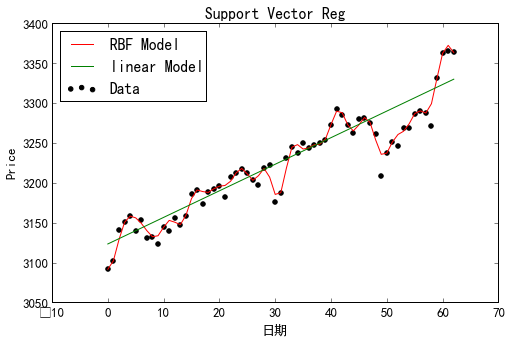

(3207.145398861609, 3219.9988235283517)


In [3]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

def predict_prices(dates, prices, x):
    idxD = [i for i in range(len(dates))]
    X = np.reshape(idxD, (len(dates), 1))
    svr_lin = SVR(kernel= 'linear', C=1e3)
#     import pdb;pdb.set_trace()
#     svr_poly = SVR(kernel= 'poly', C=1e3, degree= 2)
    svr_rbf = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
#     X = np.arange(len(dates))
    svr_lin.fit(X, prices)
#     svr_poly.fit(X, prices)
    svr_rbf.fit(X, prices)
    plt.scatter(X,
                prices,
                color="black",
                label="Data")
    plt.plot(X,
             svr_rbf.predict(X),
             color="red",
             label="RBF Model")

    plt.plot(X,
             svr_lin.predict(X),
             color="green",
             label='linear Model')
#     plt.plot(X,
#              svr_poly.predict(X),
#              color="blue",
#              label="Ploynomial Model")

    plt.xlabel(u'日期')
    plt.ylabel('Price')
#     fig, ax = plt.subplots()
    ax = plt.figure(1).get_axes()[0]
    div_n = len(ax.get_xticks())
#     print ticks,len(ticks)
    allc = len(X)
    # lastd = bars.index[-1]
    if allc / div_n > 12:
        div_n = allc / 12
    idx = range(0, allc, div_n)
    print idx,[dates[i] for i in idx]
#     plt.xticks(X,[dates[i] for i in idx],rotation=15)
#     plt.xticks(X,dates,rotation=15)
#     ax.set_xticklabels([dates[i] for i in (np.append(ticks[:-1], len(X) - 1))],rotation=15)
    plt.title('Support Vector Reg')
    plt.legend(loc='upper left')
    plt.autoscale(enable=True)
    plt.show()
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0]

# get_data('aapl.csv')
df = tdd.get_tdx_Exp_day_to_df('999999',start=20170602,end=None).sort_index(ascending=True)
dates = [i.replace('-','') for i in df.index.tolist()]
prices = df.close.apply(lambda x:round(x,2)).tolist()
# import IPython.core.debugger
# dbg = IPython.core.debugger.Pdb()
# dbg.set_trace()
# import pdb;pdb.set_trace()
print dates[:4],len(dates)
predicted_prices = predict_prices(dates, prices, 29)
print (predicted_prices)

## linear.py

Dates-  ['20170605', '20170606']
Prices-  [3102.1100000000001, 3084.54]


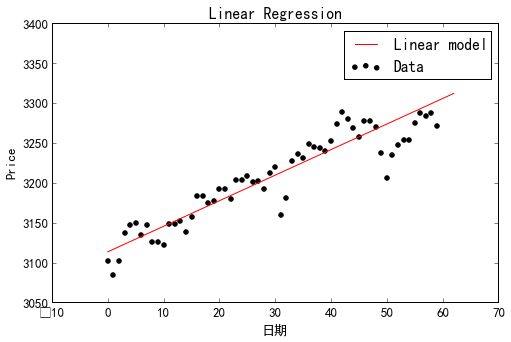


The stock open price for 29th Feb is: $ 3206.42849622
The regression coefficient is  3.20519633257 , and the constant is  3113.47780258
the relationship equation between dates and prices is: price =  3.20519633257 * date +  3113.47780258


In [4]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader) # skipping column names
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

def predict_price(dates, prices, x):
    idxD = [i for i in range(len(dates))]
    X = np.reshape(idxD, (len(dates), 1))
    prices = np.reshape(prices, (len(prices),1))
    linear_mod = linear_model.LinearRegression() # defining the linear regression model
    linear_mod.fit(X, prices) # fitting the data points in the model
    plt.scatter(X, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
    plt.plot(X, linear_mod.predict(X), color= 'red', label= 'Linear model') # plotting the line made by linear regression
    plt.xlabel(u'日期')
    plt.ylabel('Price')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    return linear_mod.predict(x)[0][0], linear_mod.coef_[0][0], linear_mod.intercept_[0]

# get_data('aapl.csv') # calling get_data method by passing the csv file to it
dates = [i.replace('-','') for i in df.index.tolist()]
prices = df.open.apply(lambda x:round(x,2)).tolist()
print "Dates- ", dates[:2]
print "Prices- ", prices[:2]

predicted_price, coefficient, constant = predict_price(dates, prices, 29)  
print "\nThe stock open price for 29th Feb is: $", str(predicted_price)
print "The regression coefficient is ", str(coefficient), ", and the constant is ", str(constant)
print "the relationship equation between dates and prices is: price = ", str(coefficient), "* date + ", str(constant)

#  SimRank

## PythonでSimRankを実装した

In [3]:
import numpy as np

def simrank(G,C,n,t=10):
    S = np.identity(n)
    I = np.identity(n)
    G = normalize(G)
    i = 1
    while True:
        S = C * np.dot(np.dot(G.T,S),G) + (1-C) * I
        for j in range(n):
            S[j][j] = 1
        if i >= t:
            break
        i += 1
    return S

def bipertite_simrank(G,C,n,m,diag_1=True,t=10):
    S1 = np.identity(n)
    S2 = np.identity(m)
    I1 = np.identity(n)
    I2 = np.identity(m)
    G_T = normalize(G.T)
    G = normalize(G)
    i = 1
    while True:
        S2 = C * np.dot(np.dot(G.T,S1),G) + (1-C) * I2
        for j in range(m):
            S2[j][j] = 1
        S1 = C * np.dot(np.dot(G_T.T,S2),G_T) + (1-C) * I1
        for j in range(n):
            S1[j][j] = 1
        if i >= t:
            break
        i += 1
    return (S1,S2)

def normalize(G):
    s = G.sum(0)
    return G/s

if __name__ == '__main__':
    C = 0.8

    """ univ """
    n = 5
    G = np.zeros((n,n))
    G[0][1] = 1
    G[0][2] = 1
    G[1][3] = 1
    G[2][4] = 1
    G[3][0] = 1
    G[4][2] = 1

    S = simrank(G,C,n)
    print(S)

    print('==================')

    """ cake """
    n = 2
    m = 4
    G = np.zeros((n,m))
    G[0][0] = 1
    G[0][1] = 1
    G[0][2] = 1
    G[1][1] = 1
    G[1][2] = 1
    G[1][3] = 1

    S1, S2 = bipertite_simrank(G,C,n,m)
    print("s1:",S1)
    print("s2",S2)

[[1.         0.         0.1321943  0.         0.032768  ]
 [0.         1.         0.4131072  0.         0.10575544]
 [0.1321943  0.4131072  1.         0.04096    0.08687124]
 [0.         0.         0.04096    1.         0.33048576]
 [0.032768   0.10575544 0.08687124 0.33048576 1.        ]]
s1: [[1.         0.54658196]
 [0.54658196 1.        ]]
s2 [[1.         0.61863088 0.61863088 0.43726175]
 [0.61863088 1.         0.61863088 0.61863088]
 [0.61863088 0.61863088 1.         0.61863088]
 [0.43726175 0.61863088 0.61863088 1.        ]]


## SimRank algorithm implementation in Python

In [7]:
import numpy
from numpy import matrix

with open('simrank-sample.txt', 'r') as log_fp:
    logs = [ log.strip() for log in log_fp.readlines() ]

logs_tuple = [ tuple(log.split(",")) for log in logs ]

queries = list(set([ log[0] for log in logs_tuple ]))
ads = list(set([ log[1] for log in logs_tuple ]))

# Graph means the relations number
graph = numpy.matrix(numpy.zeros([len(queries), len(ads)]))

for log in logs_tuple:
    query = log[0]
    ad = log[1]
    q_i = queries.index(query)
    a_j = ads.index(ad)
    graph[q_i, a_j] += 1

print(graph)

query_sim = matrix(numpy.identity(len(queries)))
ad_sim = matrix(numpy.identity(len(ads)))

def get_ads_num(query):
    q_i = queries.index(query)
    return graph[q_i]

def get_queries_num(ad):
    a_j = ads.index(ad)
    return graph.transpose()[a_j]

def get_ads(query):
    series = get_ads_num(query).tolist()[0]
    return [ ads[x] for x in range(len(series)) if series[x] > 0 ]

def get_queries(ad):
    series = get_queries_num(ad).tolist()[0]
    return [ queries[x] for x in range(len(series)) if series[x] > 0 ]


def query_simrank(q1, q2, C):
    """
    in this, graph[q_i] -> connected ads
    """
    """
    print "q1.ads"
    print get_ads_num(q1).tolist()
    print "q2.ads"
    print get_ads_num(q2).tolist()
    """
    if q1 == q2 : return 1
    prefix = C / (get_ads_num(q1).sum() * get_ads_num(q2).sum())
    postfix = 0
    for ad_i in get_ads(q1):
        for ad_j in get_ads(q2):
            i = ads.index(ad_i)
            j = ads.index(ad_j)
            postfix += ad_sim[i, j]
    return prefix * postfix
    

def ad_simrank(a1, a2, C):
    """
    in this, graph need to be transposed to make ad to be the index
    """
    """
    print "a1.queries"
    print get_queries_num(a1)
    print "a2.queries"
    print get_queries_num(a2)
    """
    if a1 == a2 : return 1
    prefix = C / (get_queries_num(a1).sum() * get_queries_num(a2).sum())
    postfix = 0
    for query_i in get_queries(a1):
        for query_j in get_queries(a2):
            i = queries.index(query_i)
            j = queries.index(query_j)
            postfix += query_sim[i,j]
    return prefix * postfix


def simrank(C=0.8, times=1):
    global query_sim, ad_sim

    for run in range(times):
        # queries simrank
        new_query_sim = matrix(numpy.identity(len(queries)))
        for qi in queries:
            for qj in queries:
                i = queries.index(qi)
                j = queries.index(qj)
                new_query_sim[i,j] = query_simrank(qi, qj, C)

        # ads simrank
        new_ad_sim = matrix(numpy.identity(len(ads)))
        for ai in ads:
            for aj in ads:
                i = ads.index(ai)
                j = ads.index(aj)
                new_ad_sim[i,j] = ad_simrank(ai, aj, C)

        query_sim = new_query_sim
        ad_sim = new_ad_sim


if __name__ == '__main__':
    print("queries:",queries)
    print("ads",ads)
    simrank()
    print("query_sim:",query_sim)
    print("ad_sim",ad_sim)

[[ 0.  0.  0. 15.]
 [ 0. 10.  0.  0.]
 [ 0. 20.  0.  5.]
 [16.  0. 15.  0.]
 [ 0. 30.  0.  7.]]
queries: ['tv', 'pc', 'camera', 'flower', 'digital camera']
ads ['teleflora.com', 'hp.com', 'orchids.com', 'bestbuy.com']
query_sim: [[1.         0.         0.00213333 0.         0.00144144]
 [0.         1.         0.0032     0.         0.00216216]
 [0.00213333 0.0032     1.         0.         0.00172973]
 [0.         0.         0.         1.         0.        ]
 [0.00144144 0.00216216 0.00172973 0.         1.        ]]
ad_sim [[1.00000000e+00 0.00000000e+00 3.33333333e-03 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 9.87654321e-04]
 [3.33333333e-03 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.87654321e-04 0.00000000e+00 1.00000000e+00]]
